KERNEL:  6


/tmp/ipykernel_173595/1943364092.py:88: RuntimeWarning: divide by zero encountered in power
  numerator = np.sum(np.power(window, Q + 1))
/tmp/ipykernel_173595/1943364092.py:89: RuntimeWarning: divide by zero encountered in power
  denominator = np.sum(np.power(window, Q))
/tmp/ipykernel_173595/1943364092.py:90: RuntimeWarning: invalid value encountered in scalar divide
  result[i, j] = numerator / (denominator + 1e-5)  # avoid division by zero
/tmp/ipykernel_173595/1943364092.py:92: RuntimeWarning: invalid value encountered in cast
  return np.clip(result, 0, 255).astype(np.uint8)


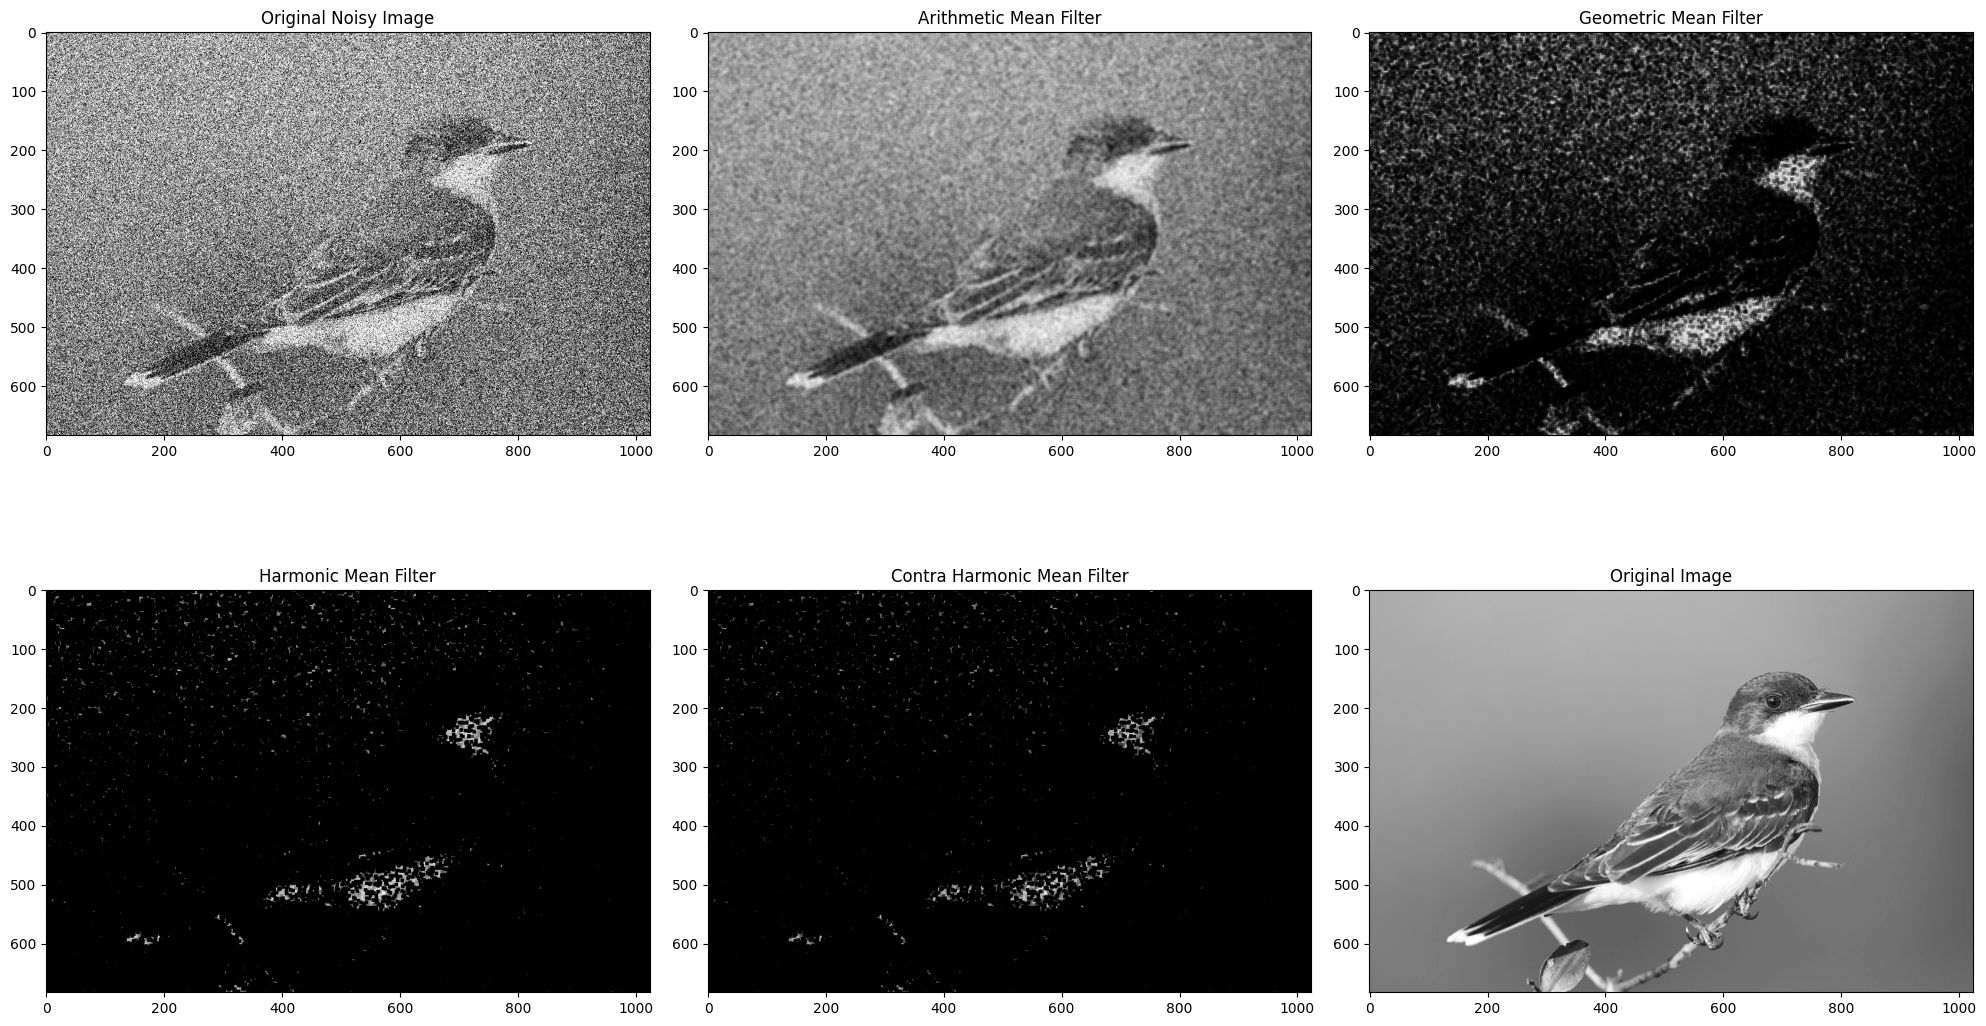

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_padded_image(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')

    # Display the padded image
    plt.imshow(padded_image, cmap='gray')
    plt.title('Padded Image')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

def geometric_mean_filter_1(input_noise):
    m, n = input_noise.shape
    output = np.zeros((m, n))  # Placeholder output image with zeros

    for i in range(1, m - 1):  # Loop through each pixel in the image
        for j in range(1, n - 1):
            # Extract the 3x3 window around the pixel
            p = input_noise[i - 1, j - 1]
            q = input_noise[i - 1, j]
            r = input_noise[i - 1, j + 1]
            s = input_noise[i, j - 1]
            t = input_noise[i, j]
            u = input_noise[i, j + 1]
            v = input_noise[i + 1, j - 1]
            w = input_noise[i + 1, j]
            x = input_noise[i + 1, j + 1]
            
            # Calculate the geometric mean
            val = (p * q * r * s * t * u * v * w * x) ** (1 / 9)
            output[i, j] = val  # Set output pixel to the computed geometric mean

    return output

def arithmetic_mean_filter(image, kernel_size=3):
    print("KERNEL: ", kernel_size)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    # Adjust loops to avoid out-of-bounds errors
    for i in range(pad_size, padded_image.shape[0] - pad_size):
        for j in range(pad_size, padded_image.shape[1] - pad_size):
            # Extract the window around the pixel (i, j)
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            
            # Compute the arithmetic mean of the window
            result[i - pad_size, j - pad_size] = np.mean(window)

    return np.clip(result, 0, 255).astype(np.uint8)

def geometric_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.exp(np.mean(np.log(window + 1e-5)))  # avoid log(0)
            
    
    return np.clip(result, 0, 255).astype(np.uint8)

def harmonic_mean_filter(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = kernel_size * kernel_size / np.sum(1.0 / (window + 1e-5))  # avoid division by zero
    
    return np.clip(result, 0, 255).astype(np.uint8)

def contraharmonic_mean_filter(image, kernel_size=3, Q=1.5):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+kernel_size, j:j+kernel_size]
            numerator = np.sum(np.power(window, Q + 1))
            denominator = np.sum(np.power(window, Q))
            result[i, j] = numerator / (denominator + 1e-5)  # avoid division by zero
    
    return np.clip(result, 0, 255).astype(np.uint8)


# ======================

def add_gaussian_noise(img, mean, stddev):
    gaussian_noise = np.random.normal(mean, stddev, img.shape)
    noisy_img = img + gaussian_noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def add_rayleigh_noise(img, scale):
    rayleigh_noise = np.random.rayleigh(scale, img.shape)
    noisy_img = img + rayleigh_noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def add_gamma_noise(img, shape, scale):
    gamma_noise = np.random.gamma(shape, scale, img.shape)
    noisy_img = img + gamma_noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def add_exponential_noise(img, scale):
    exponential_noise = np.random.exponential(scale, img.shape)
    noisy_img = img + exponential_noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def add_uniform_noise(img, low, high):
    uniform_noise = np.random.uniform(low, high, img.shape)
    noisy_img = img + uniform_noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(img, salt_prob, pepper_prob):
    """
    Add salt and pepper noise to an image.
    :param img: Input grayscale image.
    :param salt_prob: Probability of salt noise.
    :param pepper_prob: Probability of pepper noise.
    :return: Noisy image.
    """
    noisy_img = img.copy()
    total_pixels = img.size
    
    if salt_prob > 0:

        # Salt noise
        num_salt = int(total_pixels * salt_prob)
        coords_salt = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
        noisy_img[coords_salt[0], coords_salt[1]] = 255

    if pepper_prob > 0:
        
        # Pepper noise
        num_pepper = int(total_pixels * pepper_prob)
        coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
        noisy_img[coords_pepper[0], coords_pepper[1]] = 0

    return noisy_img



# Test Filters on a Noisy Image
if __name__ == "__main__":
    img = cv2.imread('../../images/bird.jpg', cv2.IMREAD_GRAYSCALE)
    
    # Add noise
    scale = 55
    gaussian_noisy_img = add_gaussian_noise(img, mean=0, stddev=125)
    # rayleigh_noisy_img = add_rayleigh_noise(img, scale=scale)
    # gamma_noisy_img = add_gamma_noise(img, shape=2, scale=scale)
    # exp_noisy_img = add_exponential_noise(img, scale=scale)
    # uniform_noisy_img = add_uniform_noise(img, low=-30, high=30)
    # salt_pepper_noisy_image = add_salt_pepper_noise(img, salt_prob=0.1, pepper_prob=0)
    
    noisy_image = gaussian_noisy_img
    
    # Apply Filters
    kernel_size = 6
    arithmetic_mean_result = arithmetic_mean_filter(noisy_image, kernel_size=kernel_size)
    geometric_mean_result = geometric_mean_filter(noisy_image, kernel_size=kernel_size)
    harmonic_mean_result = harmonic_mean_filter(noisy_image, kernel_size=kernel_size)
    contraharmonic_mean_result = contraharmonic_mean_filter(noisy_image, kernel_size=kernel_size, Q=-1.5)

    # Display results
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 3, 1)
    plt.title("Original Noisy Image")
    plt.imshow(noisy_image, cmap='gray')

    plt.subplot(2, 3, 2)
    plt.title("Arithmetic Mean Filter")
    plt.imshow(arithmetic_mean_result, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title("Geometric Mean Filter")
    plt.imshow(geometric_mean_result, cmap='gray')

    plt.subplot(2, 3, 4)
    plt.title("Harmonic Mean Filter")
    plt.imshow(harmonic_mean_result, cmap='gray')
    
    plt.subplot(2, 3, 5)
    plt.title("Contra Harmonic Mean Filter")
    plt.imshow(contraharmonic_mean_result, cmap='gray')

    plt.subplot(2, 3, 6)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')

    plt.tight_layout()
    plt.show()

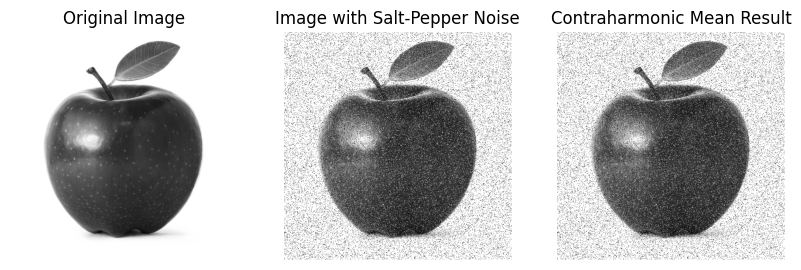

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    """
    Add salt-and-pepper noise to an image.
    
    Parameters:
    - image: Input grayscale image (numpy array).
    - salt_prob: Probability of salt noise (white pixels).
    - pepper_prob: Probability of pepper noise (black pixels).
    
    Returns:
    - Noisy image with salt-and-pepper noise added.
    """
    noisy_image = image.copy()
    total_pixels = image.size

    # Add salt noise
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Test the function
if __name__ == "__main__":
    # Load a sample grayscale image
    # image = np.ones((100, 100), dtype=np.uint8) * 128  # Uniform gray image
    image = cv2.imread('../../images/apple.jpg', cv2.IMREAD_GRAYSCALE)

    # Add salt-and-pepper noise
    noisy_image = add_salt_pepper_noise(image, salt_prob=0.07, pepper_prob=0.1)
    contraharmonic_mean_result = contraharmonic_mean_filter(noisy_image, kernel_size=3, Q=1.5)


    # Display the original and noisy images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Image with Salt-Pepper Noise")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Contraharmonic Mean Result")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.show()
